# 车辆CO2排放数据分析

数据来源：kaggle公开数据集

数据文件CO2_Emissions.csv说明：  
总共有7385行和12列。  
此数据集包含不同特征的各种汽车的CO2排放数据的官方记录。  
此数据集描述在Data_Description.csv表中。

## 导入和安装库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 加载数据

In [2]:
df = pd.read_csv("CO2_Emissions.csv")

## 数据描述

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.sample(5)  # 随机选择5行

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2253,AUDI,S5 QUATTRO,SUBCOMPACT,3.0,6,M6,Z,13.8,9.0,11.7,24,273
7034,JEEP,Wrangler Unlimited 4X4 eTorque,SUV - SMALL,3.6,6,A8,X,12.6,10.7,11.8,24,276
1568,HONDA,ACCORD,MID-SIZE,3.5,6,M6,X,13.0,8.4,10.9,26,251
2109,TOYOTA,HIGHLANDER,SUV - SMALL,3.5,6,AS6,X,12.5,9.3,11.1,25,255
4730,FORD,F-150 (LT Tire Pkg),PICKUP TRUCK - STANDARD,5.0,8,AS10,X,14.7,11.2,13.1,22,308


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
df.describe(include= "object").T  # DataFrame中的Dtype为object的列生成描述性统计信息。

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


In [8]:
df.shape

(7385, 12)

In [9]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
df.duplicated().sum()  # 计算重复行的数量

1103

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.shape

(6282, 12)

重新定义列名

In [13]:
df.columns = df.columns.str.replace(" (L/100 km)", "")
df.columns = df.columns.str.replace("(L)", "")
df.columns = df.columns.str.replace("(g/km)", "")
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         6282 non-null   object 
 1   model                        6282 non-null   object 
 2   vehicle_class                6282 non-null   object 
 3   engine_size                  6282 non-null   float64
 4   cylinders                    6282 non-null   int64  
 5   transmission                 6282 non-null   object 
 6   fuel_type                    6282 non-null   object 
 7   fuel_consumption_city        6282 non-null   float64
 8   fuel_consumption_hwy         6282 non-null   float64
 9   fuel_consumption_comb        6282 non-null   float64
 10  fuel_consumption_comb_(mpg)  6282 non-null   int64  
 11  co2_emissions                6282 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 638.0+ KB


## 探索性数据分析

### 散点图矩阵
绘制数据集中所有数值变量两两关系，快速探索数据集中多个变量之间的两两关系。

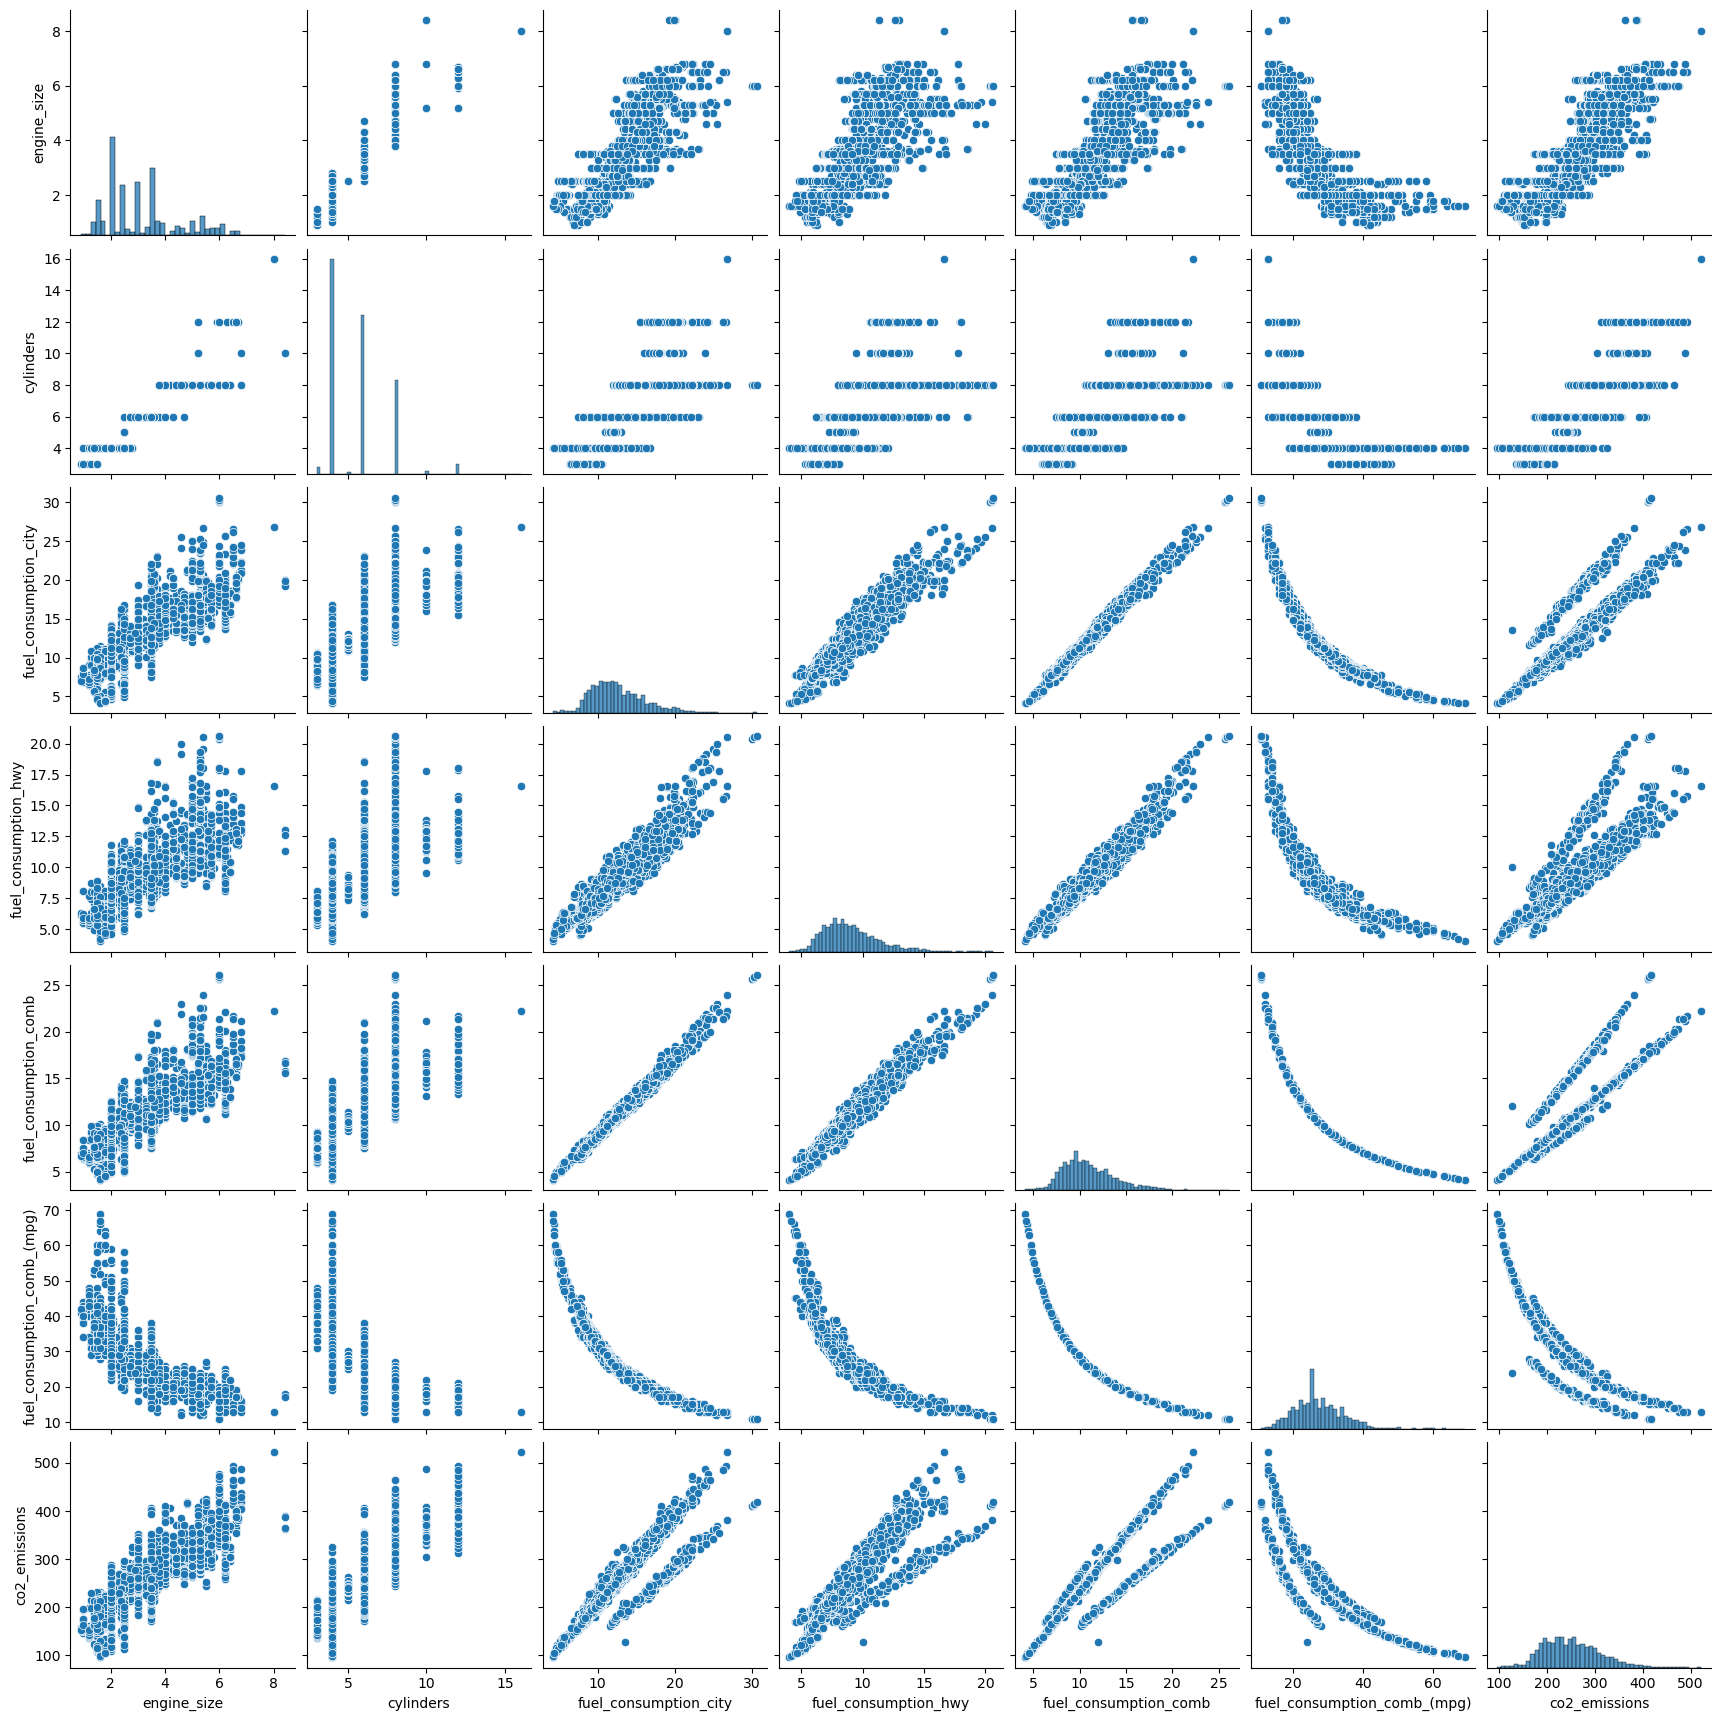

In [15]:
sns.pairplot(df)

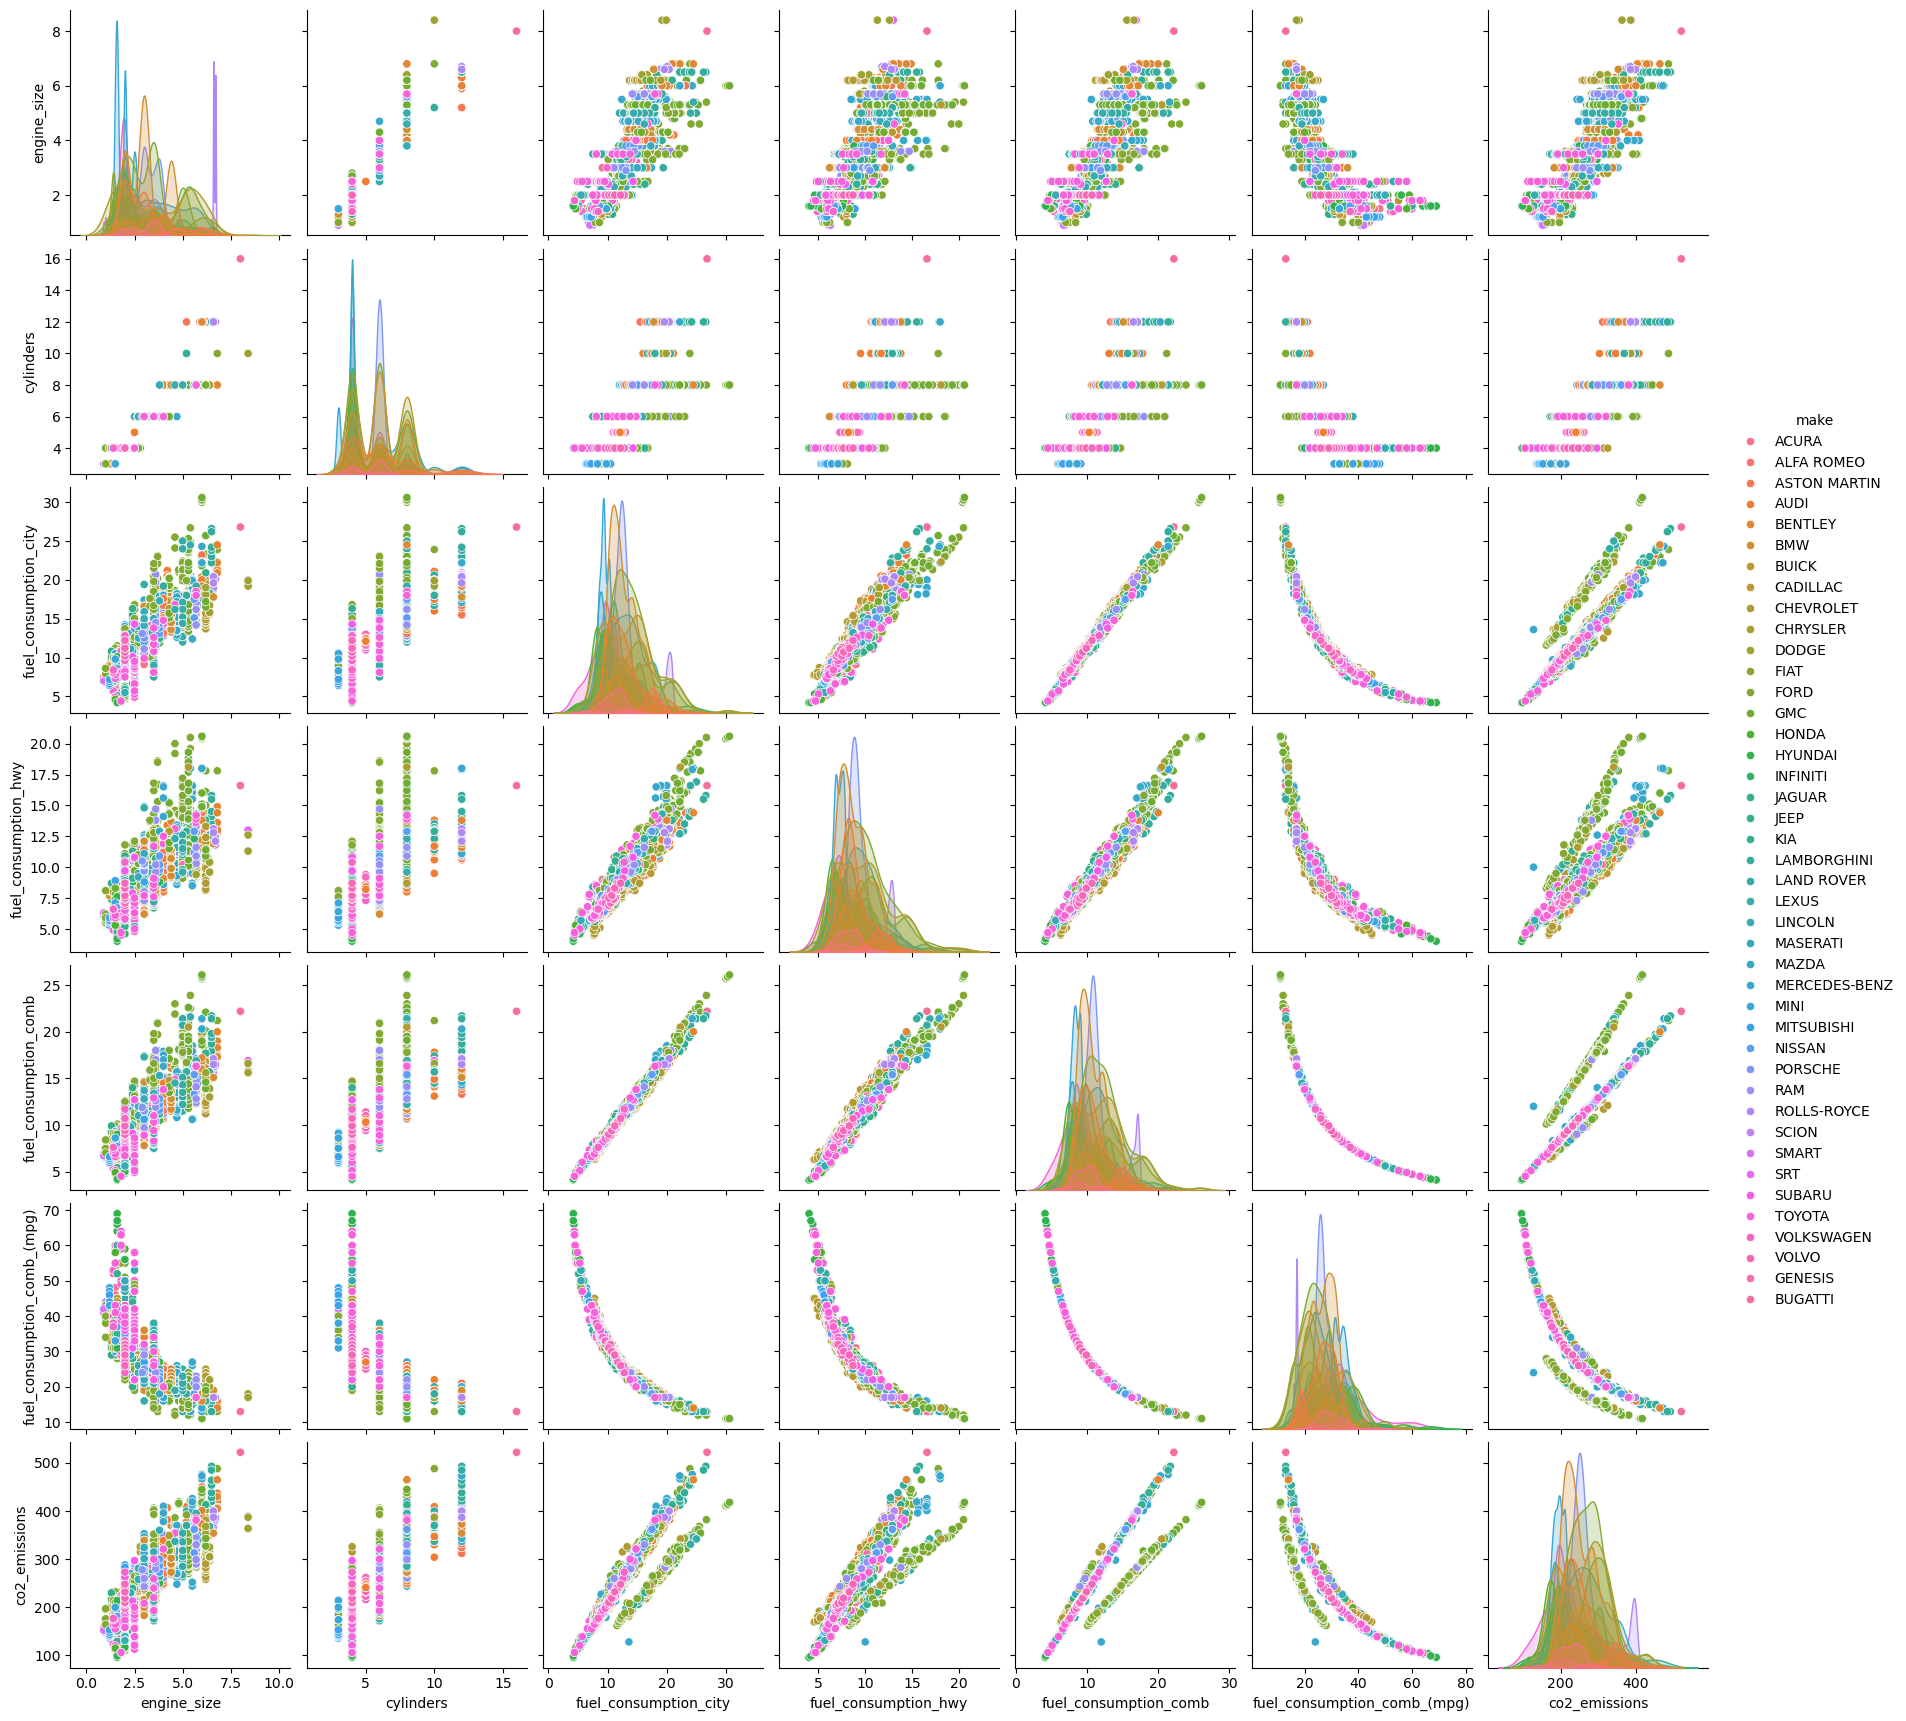

In [16]:
sns.pairplot(df, hue='make')  #调整颜色

## 分类变量分布

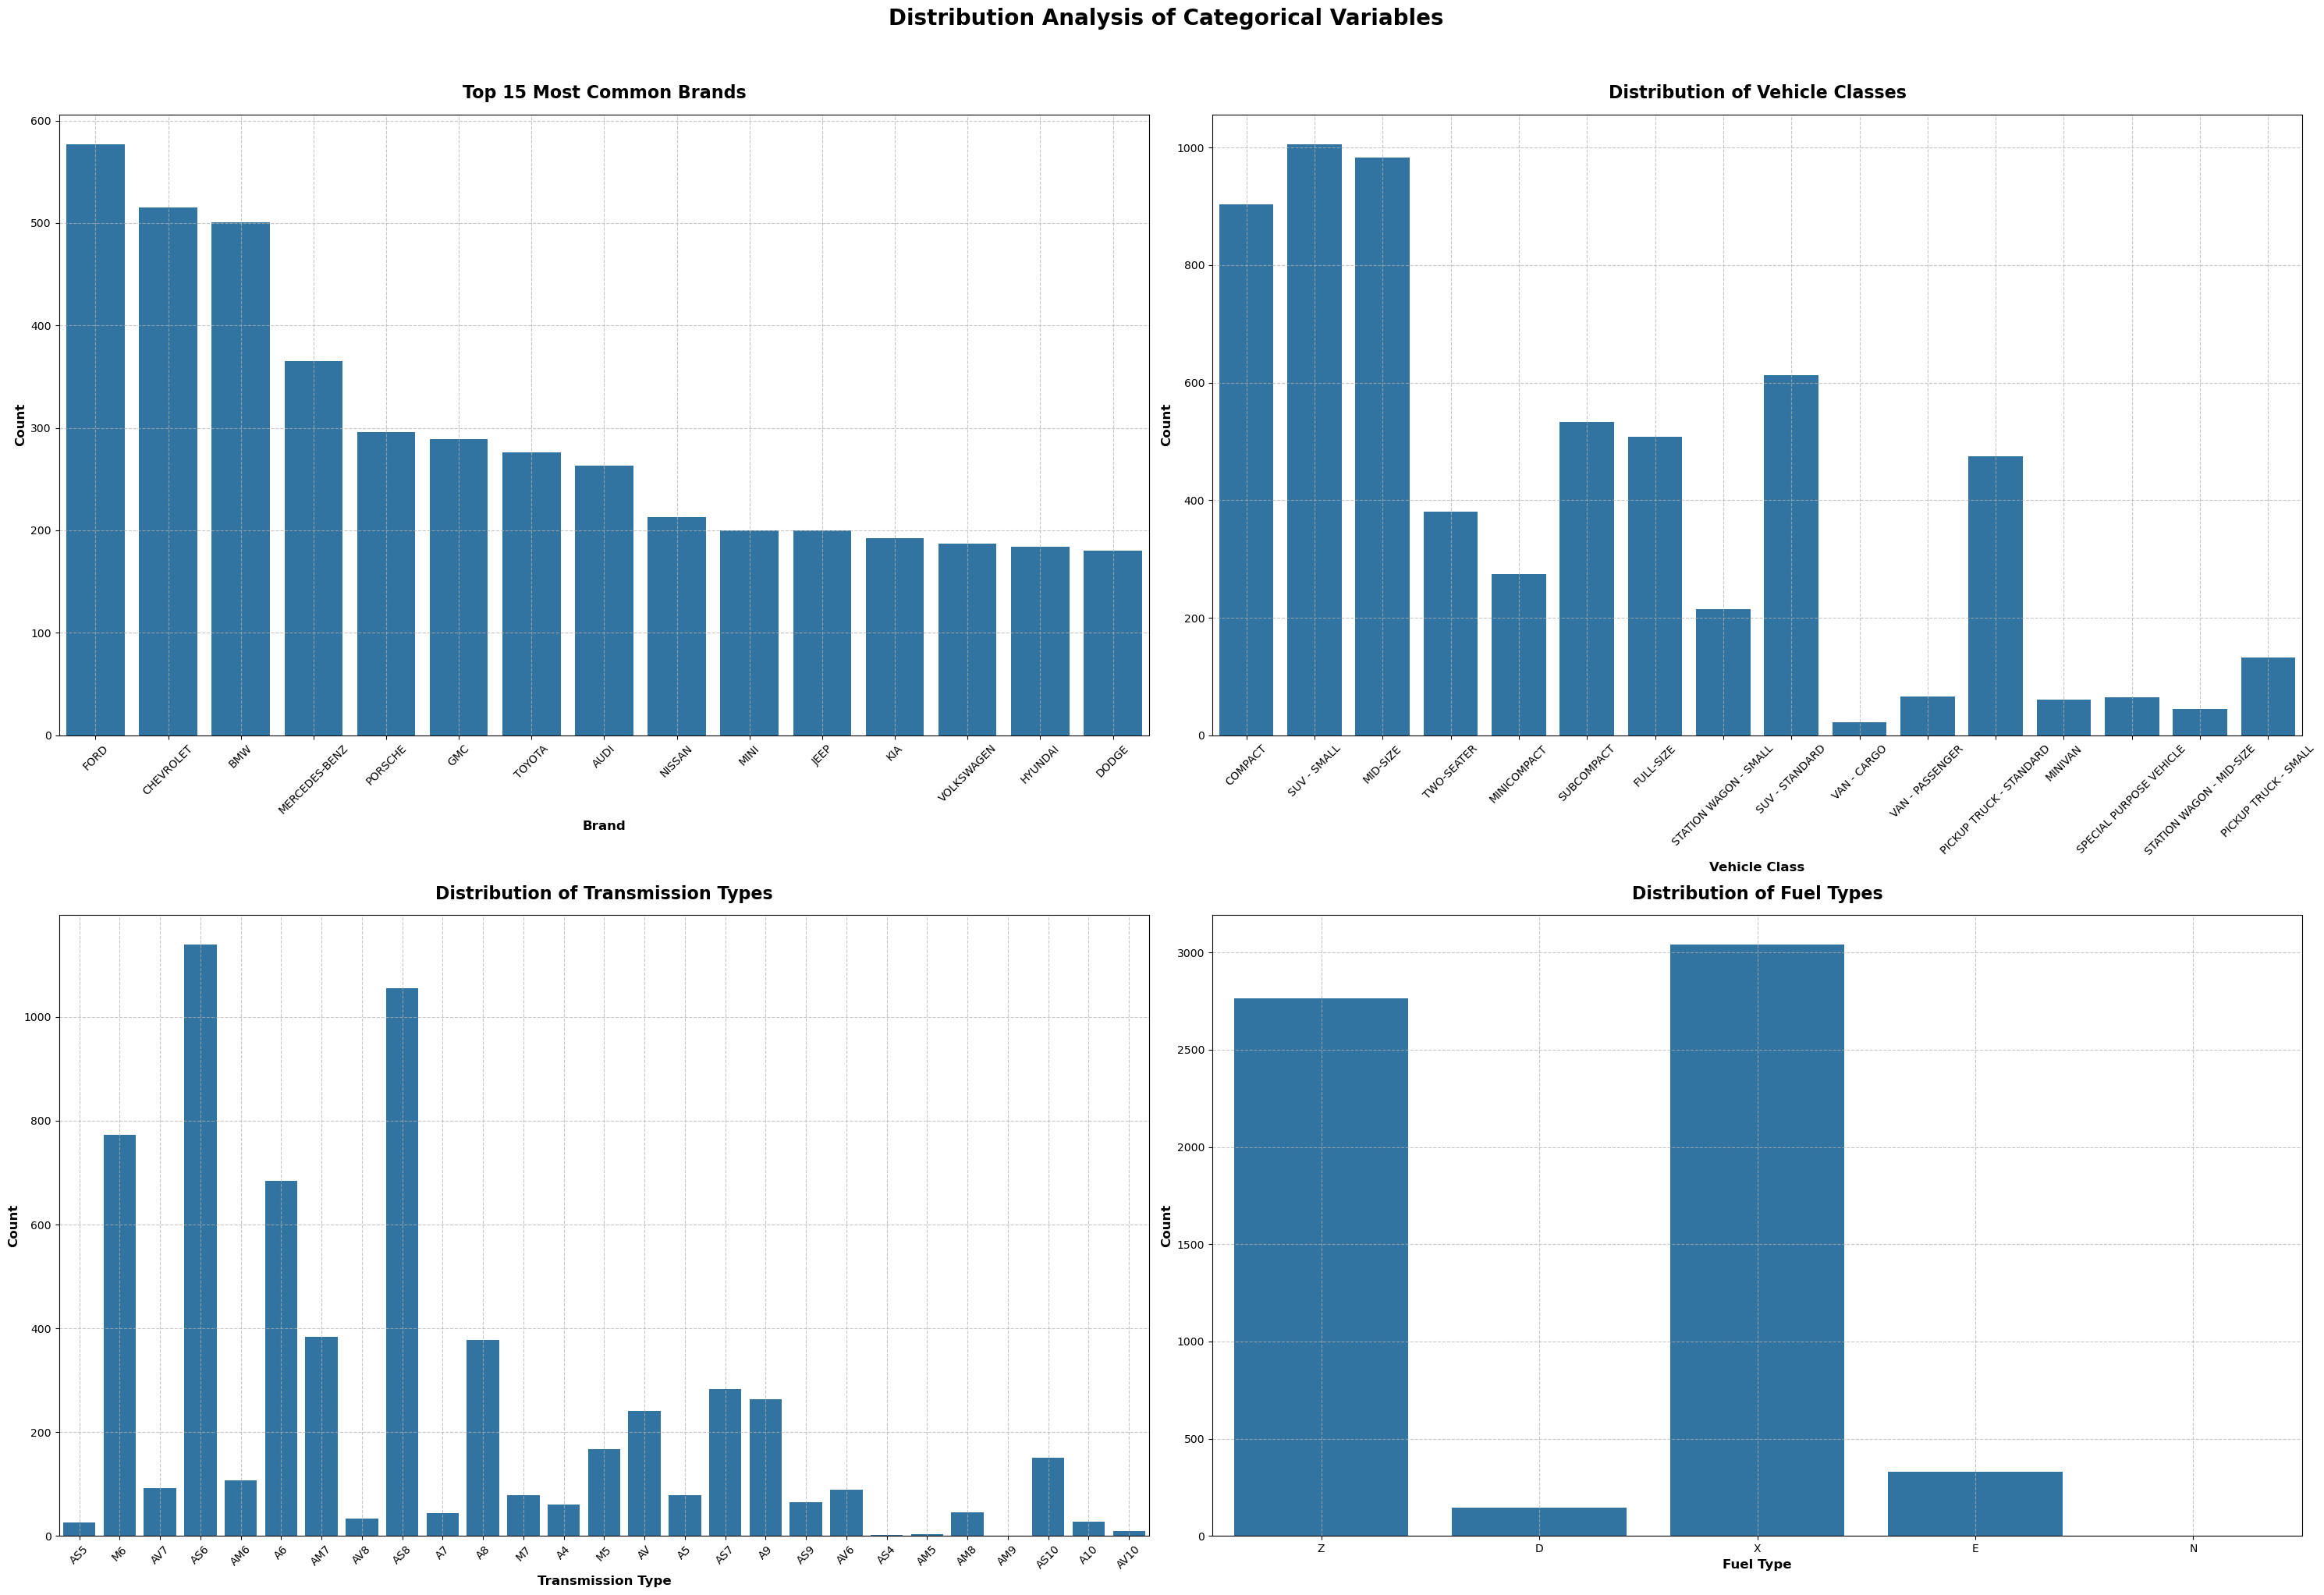

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))

sns.countplot(data=df, x='make', ax=axes[0,0], 
              order=df['make'].value_counts().iloc[:15].index)
axes[0,0].set_title('Top 15 Most Common Brands', pad=15, fontsize=16, fontweight='bold')
axes[0,0].set_xlabel('Brand', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,0].tick_params(axis='y', labelsize=10)
axes[0,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='vehicle_class', ax=axes[0,1])
axes[0,1].set_title('Distribution of Vehicle Classes', pad=15, fontsize=16, fontweight='bold')
axes[0,1].set_xlabel('Vehicle Class', fontsize=12, fontweight='bold')
axes[0,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0,1].tick_params(axis='y', labelsize=10)
axes[0,1].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='transmission', ax=axes[1,0])
axes[1,0].set_title('Distribution of Transmission Types', pad=15, fontsize=16, fontweight='bold')
axes[1,0].set_xlabel('Transmission Type', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=10)
axes[1,0].tick_params(axis='y', labelsize=10)
axes[1,0].grid(True, linestyle='--', alpha=0.7)

sns.countplot(data=df, x='fuel_type', ax=axes[1,1])
axes[1,1].set_title('Distribution of Fuel Types', pad=15, fontsize=16, fontweight='bold')
axes[1,1].set_xlabel('Fuel Type', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1,1].tick_params(axis='x', labelsize=10)
axes[1,1].tick_params(axis='y', labelsize=10)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Distribution Analysis of Categorical Variables', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 数值变量间的相关性

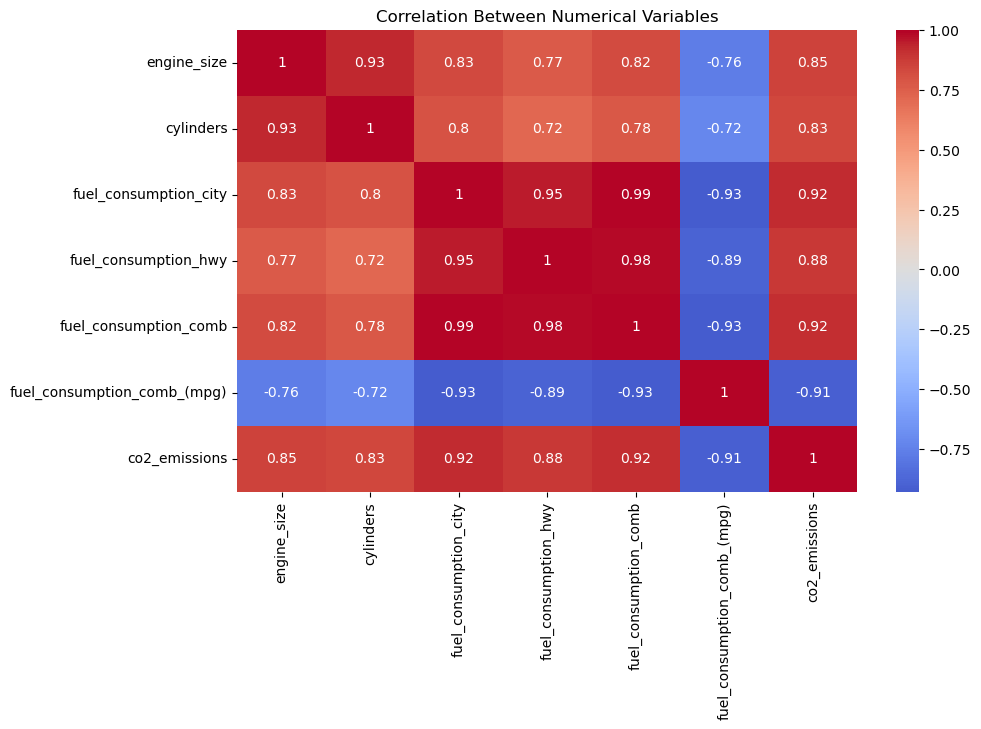

In [18]:
numeric_cols = ['engine_size', 'cylinders', 'fuel_consumption_city', 
                'fuel_consumption_hwy', 'fuel_consumption_comb', 
                'fuel_consumption_comb_(mpg)', 'co2_emissions']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numerical Variables')
plt.show()

## 部分特征的箱线图

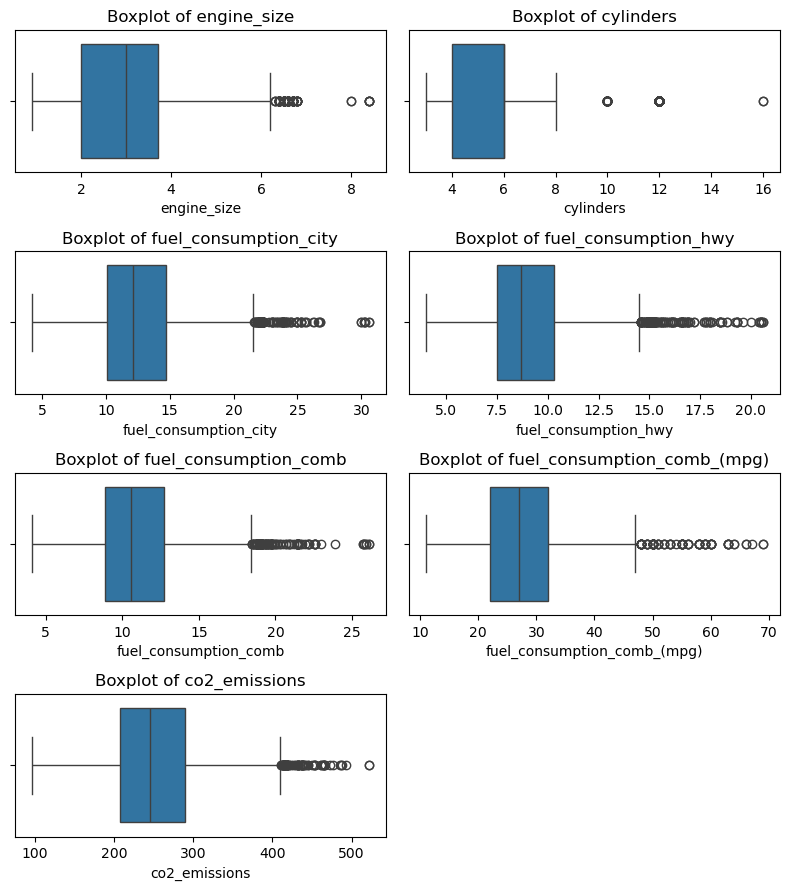

In [19]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8, 13))

axes = axes.flatten()

for index, column in enumerate(numeric_cols):
    sns.boxplot(data=df, x=column, ax=axes[index])
    axes[index].set_title(f'Boxplot of {column}')

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## 发动机尺寸和CO2排放量之间的关系

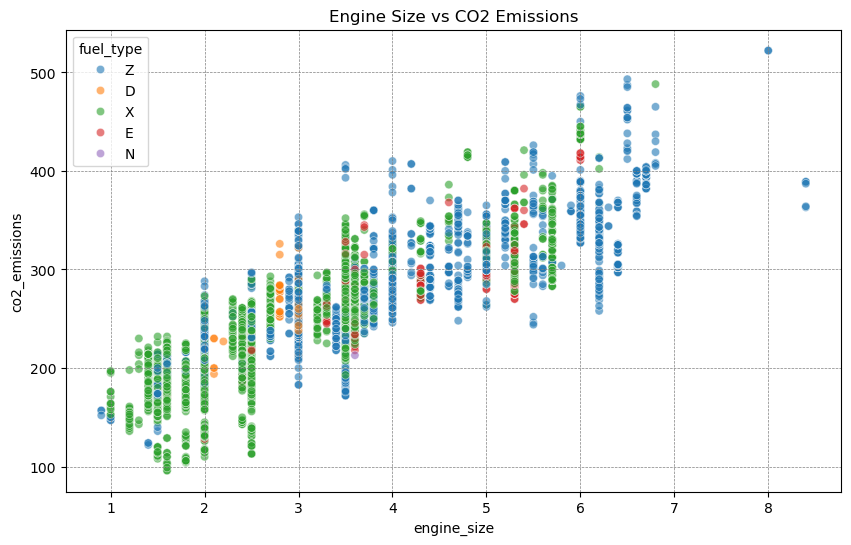

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine_size', y='co2_emissions', hue='fuel_type', alpha=0.6)
plt.title('Engine Size vs CO2 Emissions')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

## 城市道路、高速公路、综合路段燃料消耗分布的箱线图

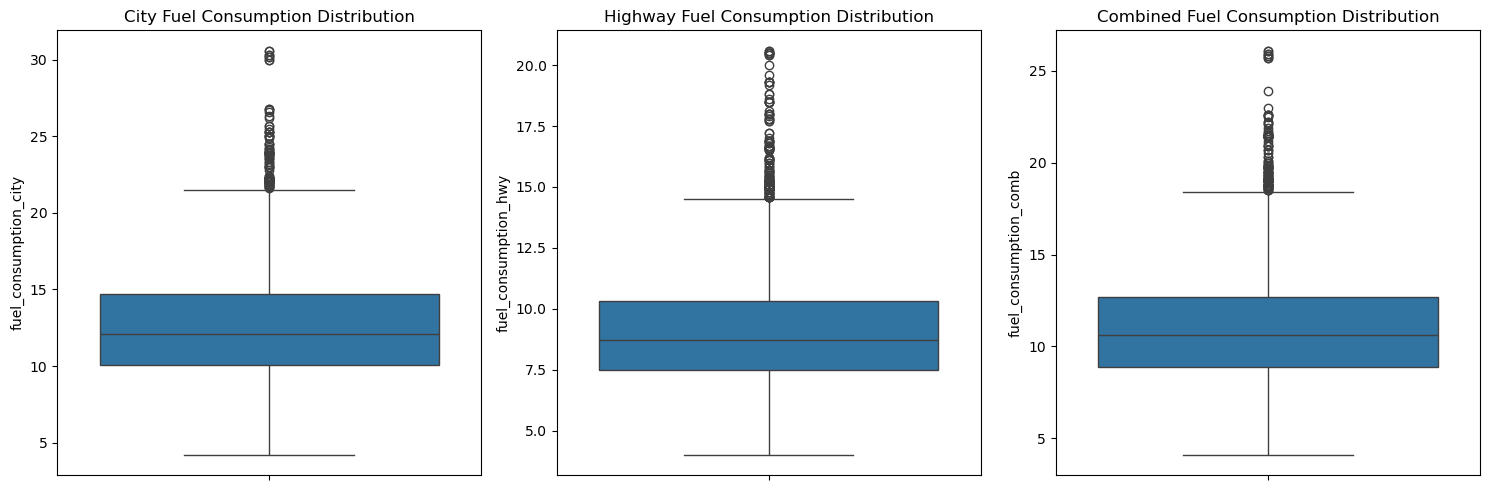

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='fuel_consumption_city', ax=axes[0])
axes[0].set_title('City Fuel Consumption Distribution')

sns.boxplot(data=df, y='fuel_consumption_hwy', ax=axes[1])
axes[1].set_title('Highway Fuel Consumption Distribution')

sns.boxplot(data=df, y='fuel_consumption_comb', ax=axes[2])
axes[2].set_title('Combined Fuel Consumption Distribution')
plt.tight_layout()
plt.show()

## 按车辆类别划分的CO2排放量

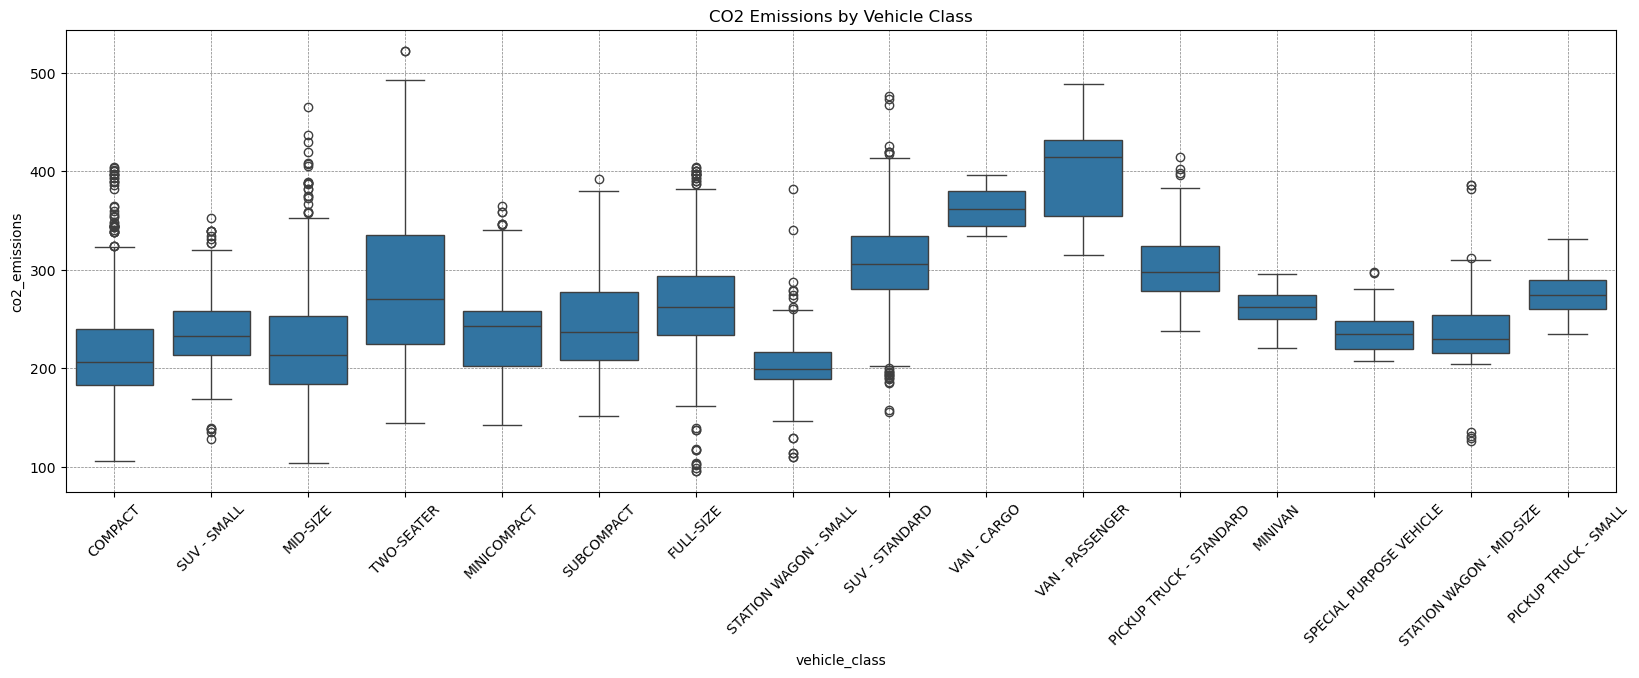

In [22]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='vehicle_class', y='co2_emissions')
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Vehicle Class')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

## 按气缸数划分的CO2排放量

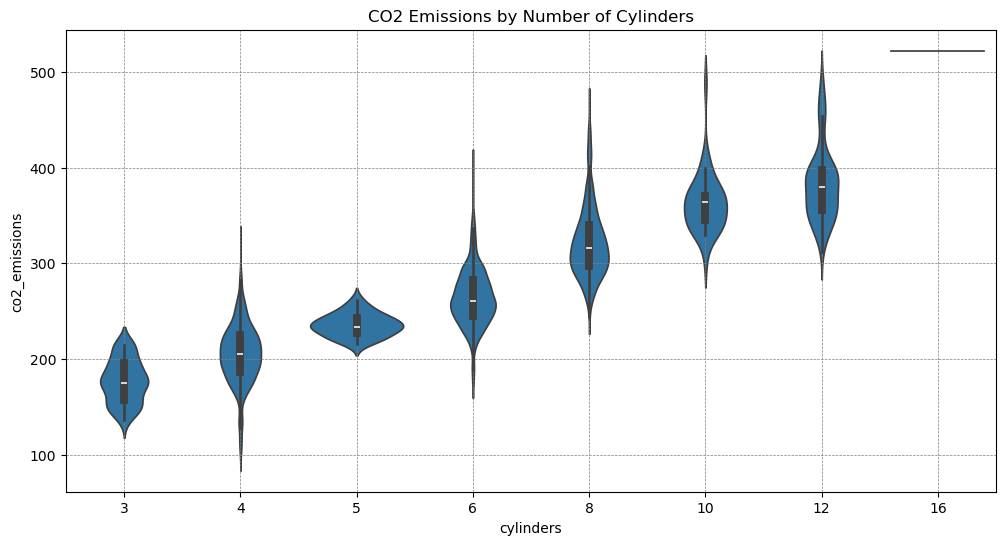

In [23]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='cylinders', y='co2_emissions')
plt.title('CO2 Emissions by Number of Cylinders')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

## 分类变量总结

In [24]:
print("\nSummary of Categorical Variables:")
for col in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    print(f"\nDistribution of {col.upper()}:")
    print(df[col].value_counts().head())


Summary of Categorical Variables:

Distribution of MAKE:
make
FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
Name: count, dtype: int64

Distribution of MODEL:
model
F-150 FFV        32
F-150 FFV 4X4    31
MUSTANG          27
FOCUS FFV        24
F-150 4X4        20
Name: count, dtype: int64

Distribution of VEHICLE_CLASS:
vehicle_class
SUV - SMALL       1006
MID-SIZE           983
COMPACT            903
SUV - STANDARD     613
SUBCOMPACT         533
Name: count, dtype: int64

Distribution of TRANSMISSION:
transmission
AS6    1139
AS8    1056
M6      773
A6      684
AM7     383
Name: count, dtype: int64

Distribution of FUEL_TYPE:
fuel_type
X    3039
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64


**分类变量分析结论：**

1. **品牌分布（MAKE）：**  
   - FORD（577辆）和CHEVROLET（515辆）是数据集中占比最高的品牌，其次是BMW（501辆），而MERCEDES-BENZ（365辆）和PORSCHE（296辆）数量较少。  
   - 推测FORD和CHEVROLET在目标市场或数据来源中占据主导地位，可能与其经济型车型或市场策略有关。  

2. **车型分布（MODEL）：**  
   - 前五名均为FORD旗下车型（如F-150 FFV、MUSTANG等），表明该品牌在数据集中具有显著的车型集中性。  
   - 可能反映FORD在特定车型（如皮卡F-150系列）的市场优势或数据采集偏向性。  

3. **车辆类别（VEHICLE_CLASS）：**  
   - 小型SUV（1006辆）和中型车（983辆）占比最高，其次是紧凑型车（903辆），显示消费者或市场对多功能车型的偏好。  
   - 标准SUV（613辆）和小型车（533辆）相对较少，可能与实用性需求或数据来源（如区域市场特征）相关。  

4. **变速器类型（TRANSMISSION）：**  
   - 自动变速器（AS6、AS8、A6合计占比约65%）占据绝对主流，手动变速器（M6、AM7）占比较少。  
   - 高比例自动挡车辆符合现代乘用车市场趋势，尤其是中高端品牌（如BMW、MERCEDES-BENZ）的配置特点。  

5. **燃料类型（FUEL_TYPE）：**  
   - X（3039辆）和Z（2765辆）是主要燃料类型（需结合具体定义，推测为汽油或混合动力）。  
   - 柴油（D, 147辆）和乙醇（E, 330辆）占比极低，新能源（N）仅1辆，反映数据集以传统燃油车为主，新能源车几乎未覆盖。  

## 前15名制造商的平均CO2排放量

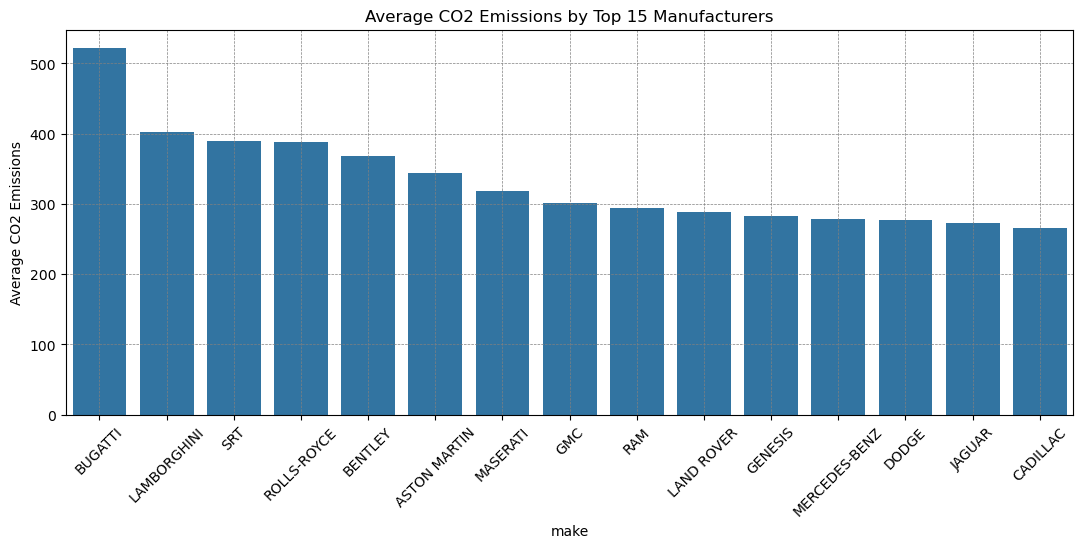

In [25]:
plt.figure(figsize=(13, 5))
avg_co2_by_make = df.groupby('make')['co2_emissions'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_co2_by_make.index, y=avg_co2_by_make.values)
plt.title('Average CO2 Emissions by Top 15 Manufacturers')
plt.xticks(rotation=45)
plt.ylabel('Average CO2 Emissions')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

## 城市与高速公路油耗比较

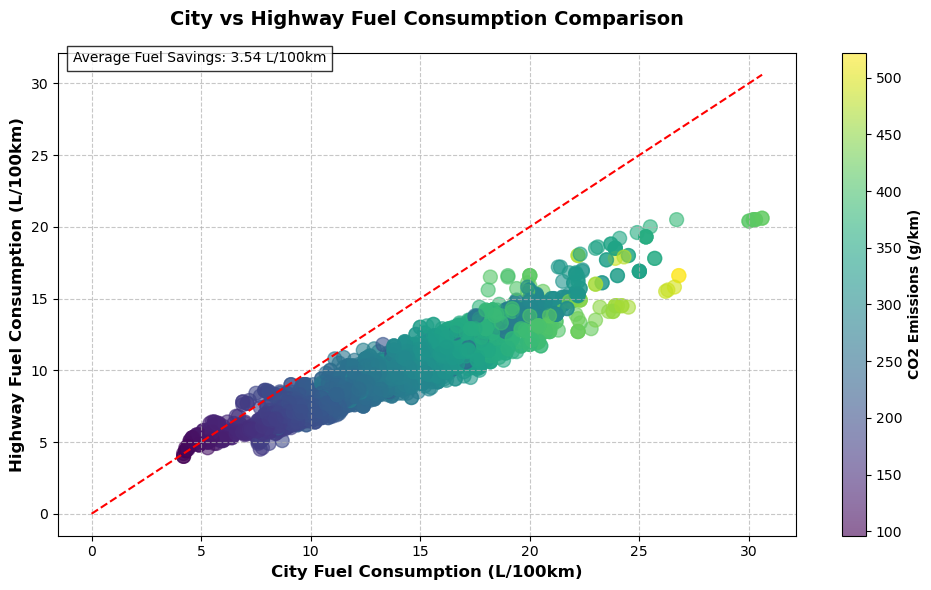

In [26]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['fuel_consumption_city'], 
                     df['fuel_consumption_hwy'],
                     alpha=0.6,
                     c=df['co2_emissions'],
                     cmap='viridis',
                     s=100)

plt.plot([0, max(df['fuel_consumption_city'])], 
         [0, max(df['fuel_consumption_city'])], 
         'r--', 
         label='Equal Consumption Line')

plt.xlabel('City Fuel Consumption (L/100km)', fontsize=12, fontweight='bold')
plt.ylabel('Highway Fuel Consumption (L/100km)', fontsize=12, fontweight='bold')
plt.title('City vs Highway Fuel Consumption Comparison', 
          fontsize=14, 
          fontweight='bold', 
          pad=20)

plt.grid(True, linestyle='--', alpha=0.7)

colorbar = plt.colorbar(scatter)
colorbar.set_label('CO2 Emissions (g/km)', fontsize=10, fontweight='bold')

avg_diff = (df['fuel_consumption_city'] - df['fuel_consumption_hwy']).mean()
plt.text(0.02, 0.98, 
         f'Average Fuel Savings: {avg_diff:.2f} L/100km', 
         transform=plt.gca().transAxes,
         fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 按车辆类别划分的油耗与二氧化碳排放

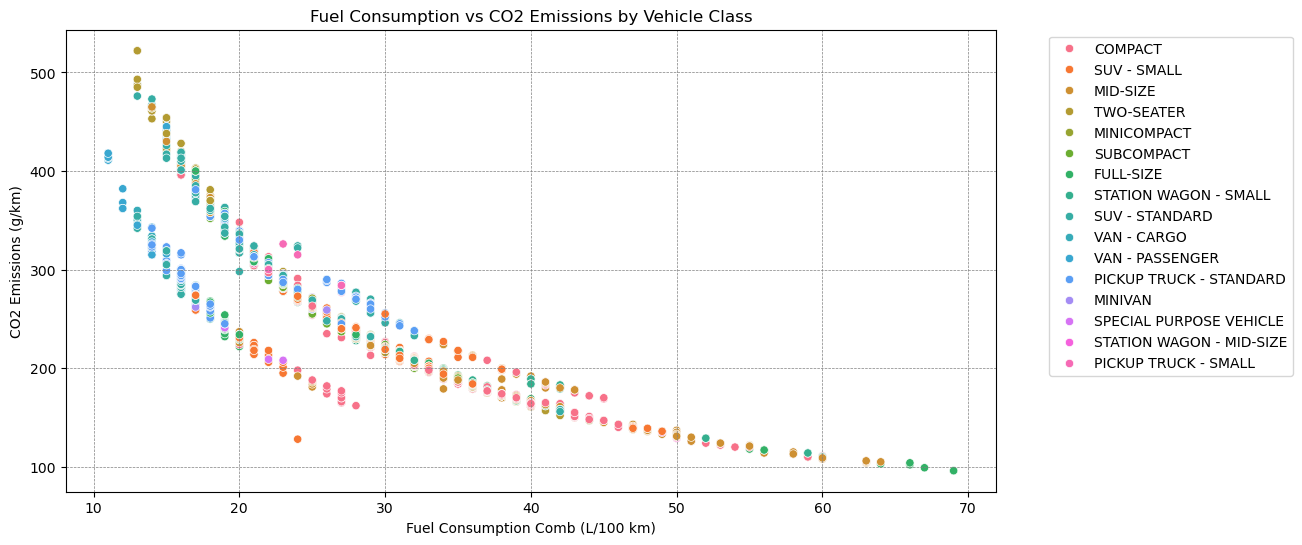

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="fuel_consumption_comb_(mpg)", y="co2_emissions", hue="vehicle_class", data=df)
plt.title("Fuel Consumption vs CO2 Emissions by Vehicle Class")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()